## Create Waterfall Plot from 3d Displacement Data
    This piggy-backs off a text readout of a grid point number followed  
    by displacement data through a fixed frequency range. 
    
    txt file structure
    & node id 1
    x, y, z                  # for node 1, freq 1
    ...
    ...
    x, y, z                  # for node 1, freq 180
    & node id 2
    x, y, z                  # for node 2, freq 1
    ...
  
    
    
    
#### 1.) import txt data and create two lists, one for node ID and one for disp. data

In [1]:
import numpy as np

pch_file = open(r'E:\Users\ra029548\DevProjects\1._python\4. AutoPunchFileParse\1. frf_try_1\output_text\pch_v2.txt')

pch = []
grids = [] 
for row in pch_file:
    if row[0] != '$':
        pch.append(row[:-1].split(','))
    if row[0] == '$':
        grids.append(row[1:].strip())

***
#### 2.) A couple of print statements to check to make sure we're populating the lists as we expected.

In [2]:
print 'punch data lines: ', len(pch)
print 'number of grids: ', len(grids)
print 'freq. band: ', len(pch)/ len(grids)

punch data lines:  15120
number of grids:  84
freq. band:  180


***
#### 3.) Convert 3D displacement into a magnitude and append to a new list

In [3]:
mags = []
for row in pch:
    mags.append(np.sqrt(float(row[0])**2 + float(row[1])**2 + float(row[2])**2))
    

---
#### 4.) List comprehension to split full 3D data list by frequency band length
       This will make it easier to keep track of magnitude data per 
       each node

In [4]:
chunks = [mags[x:x+180] for x in xrange(0, len(mags), 180)]
print len(chunks)
print len(chunks[0])
print chunks[-1][0]

84
180
0.00461663910848


---
#### 5.) Grab a waterfall plot style that I liked from http://matplotlib.org/
    Then it's a simple matter of substituting my data for the data in
    the example source code below.
    
    Original Source Code: http://matplotlib.org/examples/mplot3d/polys3d_demo.html
       

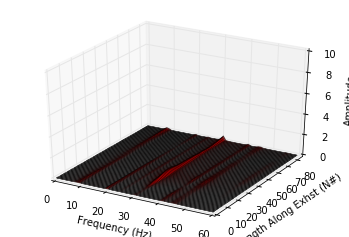

In [6]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from matplotlib.colors import colorConverter
import matplotlib.pyplot as plt
# import numpy as np             - already imported above

fig = plt.figure()
ax = fig.gca(projection='3d')


def cc(arg):
    return colorConverter.to_rgba(arg, alpha=0.6)

# xs = np.arange(0, 10, 0.4)   - original code
xs = np.arange(0,180,1)        # new code
verts = []
# zs = [0.0, 1.0, 2.0, 3.0]    - original code
zs = np.arange(0,84,1)         # new code

for z in zs:
    # ys = np.random.rand(len(xs)) - original code
    # ys[0], ys[-1] = 0, 0         - original code
    ys = chunks[z][:61]                 # new code
    verts.append(list(zip(xs, ys)))

poly = PolyCollection(verts, facecolors=[cc('r'), cc('g'), cc('b'),
                                         cc('y')])
poly.set_alpha(0.7)
ax.add_collection3d(poly, zs=zs, zdir='y')



ax.set_xlabel('Frequency (Hz)')
# ax.set_xlim3d(0, 10)          - original code
ax.set_xlim3d(0, 60)           # new code
ax.set_ylabel('Length Along Exhst (N#)')
# ax.set_ylim3d(-1, 4)          - original code
ax.set_ylim3d(0, 84)
ax.set_zlabel('Amplitude')
# ax.set_zlim3d(0, 1)           - original code
ax.set_zlim3d(0, 10)             # new code

plt.show()